# **Importing Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load The DataSet


In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle datasets download -d lakshmi25npathi/online-retail-dataset


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset
License(s): other
online-retail-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip online-retail-dataset.zip


Archive:  online-retail-dataset.zip
replace online_retail_II.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [13]:
import pandas as pd

# Specify the file path
file_path = '/content/online_retail_II.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)


# Data Exploration

In [14]:
# Data exploration and preprocessing
# For example, check the first few rows of the DataFrame
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [15]:
# Check for missing values
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [16]:
# Summary statistics
print(df.describe())

            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


In [20]:
# Handling missing values
# Fill missing descriptions with 'Unknown'
df['Description'].fillna('Unknown', inplace=True)

# Drop rows with missing Customer IDs if they are not critical for your analysis
df.dropna(subset=['Customer ID'], inplace=True)

# Summary statistics after handling missing values
print(df.describe())






            Quantity                    InvoiceDate          Price  \
count  417534.000000                         417534  417534.000000   
mean       12.758815  2010-07-01 01:12:19.787609856       3.887547   
min     -9360.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 11:26:00       1.250000   
50%         4.000000            2010-07-08 19:12:00       1.950000   
75%        12.000000            2010-10-14 14:08:00       3.750000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       101.220424                            NaN      71.131797   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


Text(0.5, 1.0, 'Distribution of Quantity')

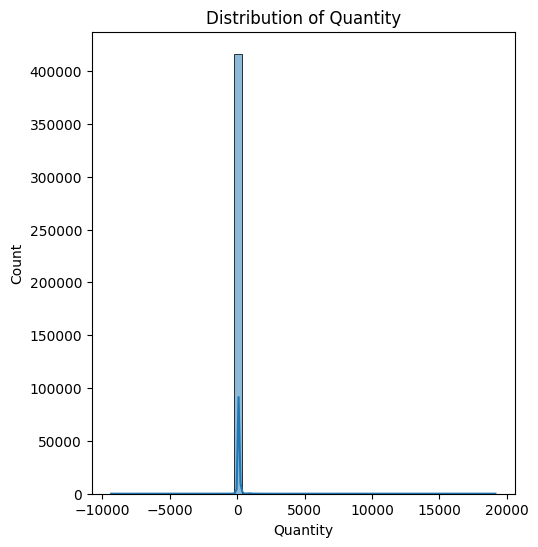

In [18]:
# Visualize distributions of Quantity and Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')


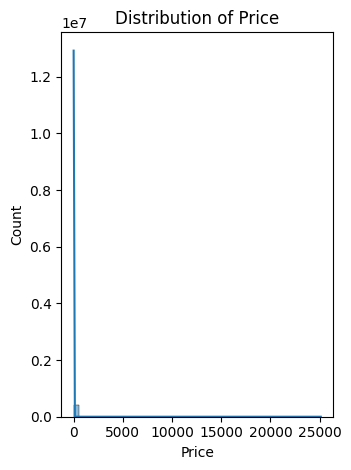

In [19]:


plt.subplot(1, 2, 2)
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

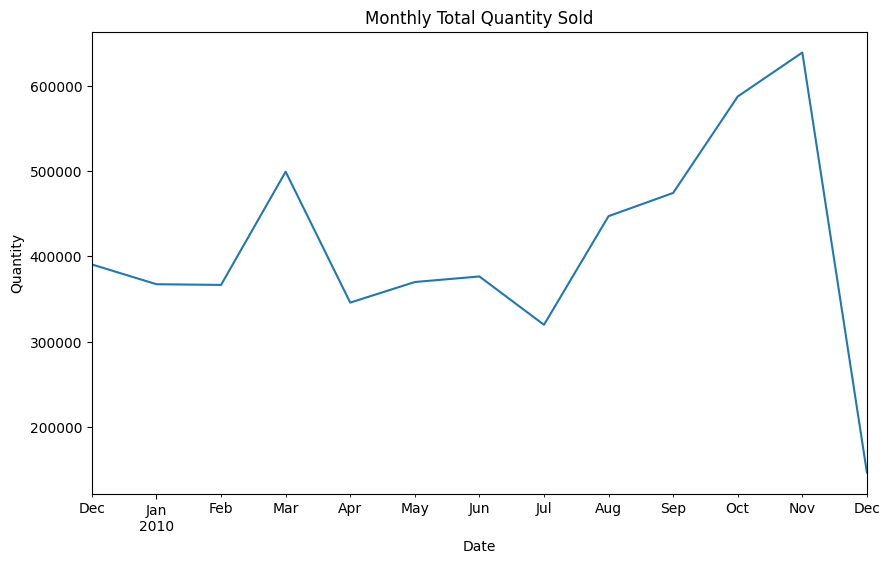

In [21]:
# Visualize transaction trends over time
plt.figure(figsize=(10, 6))
df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot()
plt.title('Monthly Total Quantity Sold')
plt.ylabel('Quantity')
plt.xlabel('Date')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset is already loaded and cleaned as per previous steps

# Aggregate data to customer level
customer_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (df['InvoiceDate'].max() - date.max()).days,
    'Invoice': 'nunique',
    'Price': 'sum'
}).reset_index()

# Rename columns for clarity
customer_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display first few rows of aggregated data
print(customer_df.head())


   CustomerID  Recency  Frequency  Monetary
0     12346.0       66         15    578.36
1     12347.0        2          2    162.95
2     12348.0       73          1     14.39
3     12349.0       42          4    899.49
4     12351.0       10          1     49.46


In [23]:
# Define features and target variable
X = customer_df[['Recency', 'Frequency', 'Monetary']]
y = customer_df['Monetary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5320.944865193664
R-squared: 0.9971629939554536


Mean Squared Error: 5320.944865193664
R-squared: 0.9971629939554536


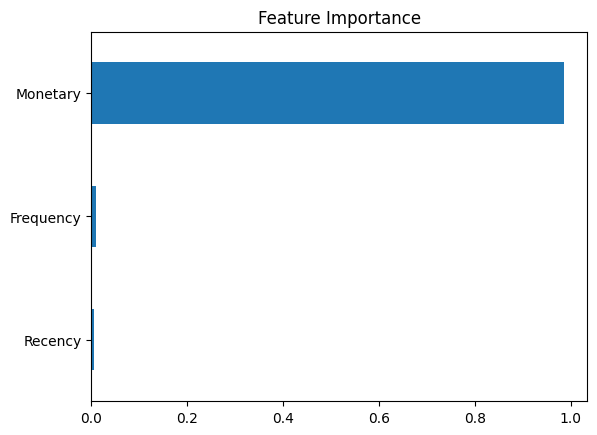

In [24]:
# Assuming you have already handled missing values and visualized initial insights

# Aggregate data to customer level
customer_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (df['InvoiceDate'].max() - date.max()).days,
    'Invoice': 'nunique',
    'Price': 'sum'
}).reset_index()

# Rename columns for clarity
customer_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Define features and target variable
X = customer_df[['Recency', 'Frequency', 'Monetary']]
y = customer_df['Monetary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.title('Feature Importance')
plt.show()


# **Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Model evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R-squared: {r2_linear}')


Linear Regression Mean Squared Error: 6.282694671569598e-25
Linear Regression R-squared: 1.0


# **XG Boost**

In [26]:
import xgboost as xgb

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')


XGBoost Mean Squared Error: 69440.50523429926
XGBoost R-squared: 0.962975911595187


**Using Neural Network**

In [27]:
!pip install tensorflow


**Prepare Data**

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define features and target variable
X = customer_df[['Recency', 'Frequency', 'Monetary']]
y = customer_df['Monetary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


****

**Build Neural Network Model**

In [29]:
# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))


In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
110/110 [==============================] - 3s 12ms/step - loss: 207607.1719 - val_loss: 7706.2798
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 49863.1641 - val_loss: 2009.9056
Epoch 3/50
110/110 [==============================] - 1s 6ms/step - loss: 57144.6953 - val_loss: 176.6349
Epoch 4/50
110/110 [==============================] - 0s 4ms/step - loss: 23559.5625 - val_loss: 23956.7305
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 12532.7686 - val_loss: 8054.3188
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 33493.1758 - val_loss: 18174.6680
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 60820.0195 - val_loss: 1507.0563
Epoch 8/50
110/110 [==============================] - 0s 2ms/step - loss: 20219.7773 - val_loss: 5403.6060
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 29484.3516 - val_loss: 7933.9663
Epoch 10/50
110/110 [=============

In [31]:
# Evaluate the model
mse_nn = model.evaluate(X_test, y_test, verbose=0)
print(f'Neural Network Mean Squared Error: {mse_nn}')

# Predict on test set
y_pred_nn = model.predict(X_test)

# Calculate R-squared
r2_nn = r2_score(y_test, y_pred_nn)
print(f'Neural Network R-squared: {r2_nn}')


Neural Network Mean Squared Error: 531.3228149414062
28/28 [==============================] - 0s 1ms/step
Neural Network R-squared: 0.9997167109919713


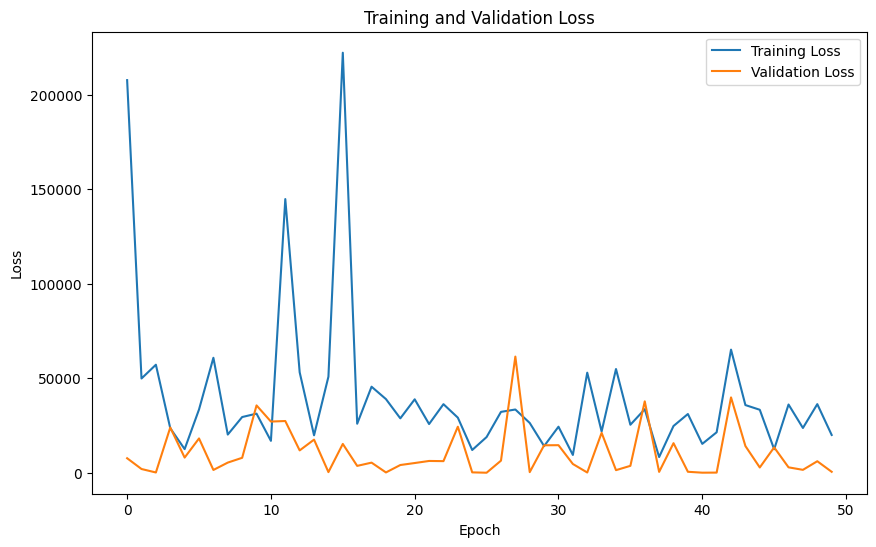

In [32]:
# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
